**1. Importing the required libraries for EDA**


In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import scipy.stats as stats
%matplotlib inline


**1.1 Loading the data into the data frame**

In [209]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [221]:
import io
df=pd.read_csv(io.BytesIO(uploaded["data.csv"]))
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**1.2 Checking the types of data and its statistics**

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [223]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [224]:
df.shape

(5000, 14)

In [225]:
df.isnull().values.any()

False

In [226]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**2. Dropping irrelevant columns**

In [227]:
df.Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [228]:
experience = df['Experience']
age = df['Age']
correlation = age.corr(experience)
correlation

0.9942148569683321

In [229]:
df = df.drop(['ID','Experience'], axis = 1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [230]:
duplicate = df[df.duplicated()]
print("No. of duplicate rows: ",duplicate)

No. of duplicate rows:  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


**3. EDA: Studying the data distribution** 

**3.1 No. of unique values in each column**

In [231]:
unique_no = df.nunique(axis = 0, dropna = True)
unique_no

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**3.2 No. of people with zero mortgage**

In [232]:
zero_mortgage = df.Mortgage[df.Mortgage == 0].count()
print("People with Zero Mortgage: ", zero_mortgage)

People with Zero Mortgage:  3462


**3.3 No. of people with zero credit card spending per month**

In [233]:
zero_cc_spend = df.CreditCard[df.CreditCard == 0].count()
print("People with zero credit card spending per month: ",zero_cc_spend)

People with zero credit card spending per month:  3530


**3.4 Value counts of all categorical columns**

In [234]:
for x in df.columns:
  if df[x].nunique(dropna = True) == 2:
    print(x,": ")
    print(df[x].value_counts())


Personal Loan : 
0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account : 
0    4478
1     522
Name: Securities Account, dtype: int64
CD Account : 
0    4698
1     302
Name: CD Account, dtype: int64
Online : 
1    2984
0    2016
Name: Online, dtype: int64
CreditCard : 
0    3530
1    1470
Name: CreditCard, dtype: int64


**3.5 Univariate and Bivariate analysis**

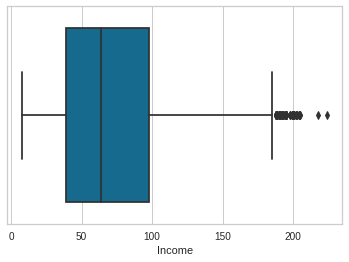

In [235]:
sns.boxplot(x=df['Income'])

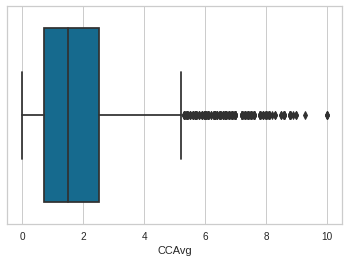

In [236]:
sns.boxplot(x=df['CCAvg'])

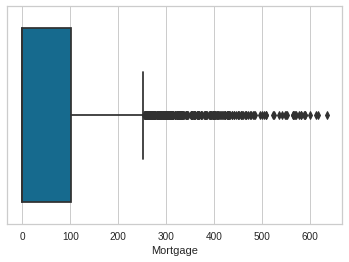

In [237]:
sns.boxplot(x=df['Mortgage'])

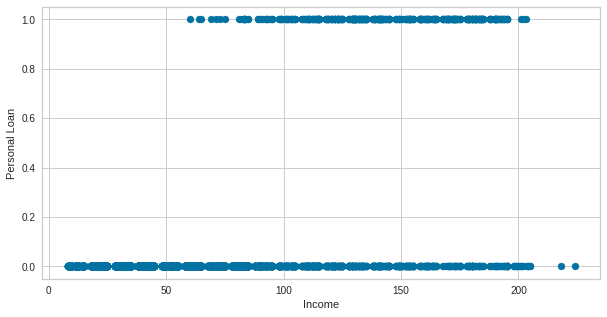

In [238]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Income'],df['Personal Loan'])
ax.set_xlabel('Income')
ax.set_ylabel('Personal Loan')
plt.show()

Text(0, 0.5, 'Personal Loan')

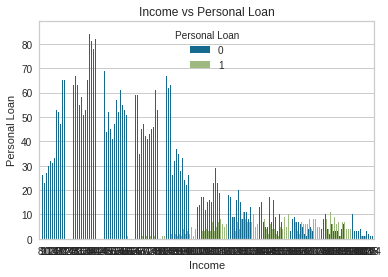

In [243]:
sns.countplot(x='Income', data = df , hue = 'Personal Loan')
plt.title('Income vs Personal Loan')
plt.xlabel('Income')
plt.ylabel('Personal Loan')

People having higher income have availed Personal Loan.

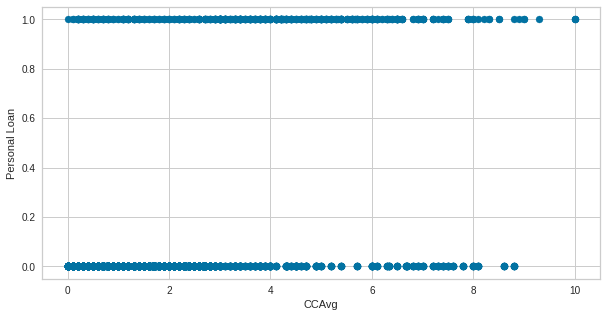

In [240]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['CCAvg'],df['Personal Loan'])
ax.set_xlabel('CCAvg')
ax.set_ylabel('Personal Loan')
plt.show()

In [241]:
df.corr()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


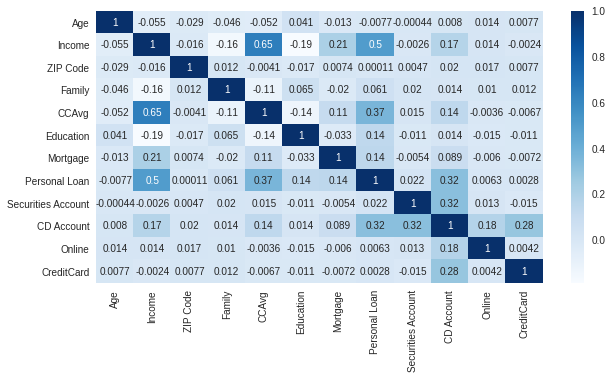

In [244]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap = "Blues",annot = True)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


Text(0.5, 0, 'Personal Loan')

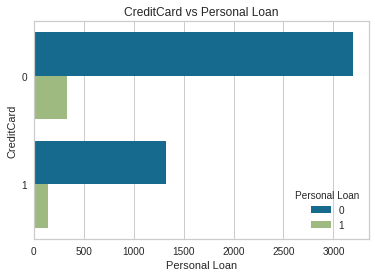

In [246]:
sns.countplot(y='CreditCard', data = df , hue = 'Personal Loan')
plt.title('CreditCard vs Personal Loan')
plt.ylabel('CreditCard')
plt.xlabel('Personal Loan')

Among people having credit card,a greater fraction has availed Personal Loan than people having no credit card.

Text(0.5, 0, 'Personal Loan')

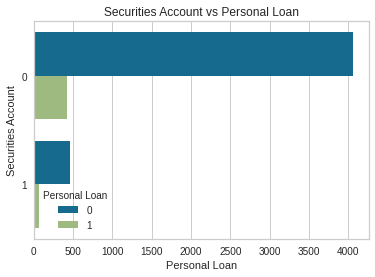

In [247]:
sns.countplot(y='Securities Account', data = df , hue = 'Personal Loan')
plt.title('Securities Account vs Personal Loan')
plt.ylabel('Securities Account')
plt.xlabel('Personal Loan')

Text(0.5, 0, 'Personal Loan')

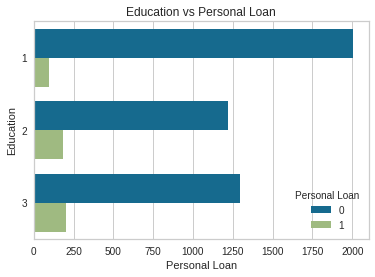

In [248]:
sns.countplot(y='Education', data = df , hue = 'Personal Loan')
plt.title('Education vs Personal Loan')
plt.ylabel('Education')
plt.xlabel('Personal Loan')

From the above graph, people with increasing education have availed Personal Loan.

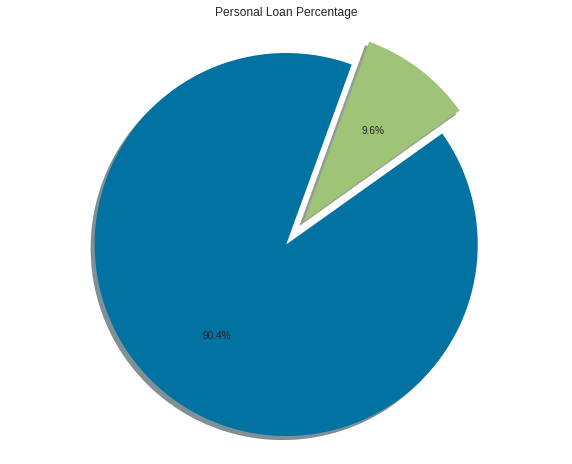

In [249]:
dframe=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
dframe.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(dframe['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

A total of **9.6%** people have availed Personal Loan

**4. Applying necessary transformations for feature variables**

In [250]:
X=df[['Age','Income','CCAvg','Education','Mortgage','Securities Account','Online',"CreditCard"]].values
y=df['Personal Loan'].values


In [251]:
X

array([[25. , 49. ,  1.6, ...,  1. ,  0. ,  0. ],
       [45. , 34. ,  1.5, ...,  1. ,  0. ,  0. ],
       [39. , 11. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [63. , 24. ,  0.3, ...,  0. ,  0. ,  0. ],
       [65. , 49. ,  0.5, ...,  0. ,  1. ,  0. ],
       [28. , 83. ,  0.8, ...,  0. ,  1. ,  1. ]])

In [252]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [253]:
X.shape

(5000, 8)

In [254]:
y.shape

(5000,)

In [255]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [256]:
X

array([[-1.77441684, -0.53822878, -0.19338544, ...,  2.92891517,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 , -0.25061056, ...,  2.92891517,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301, -0.53673618, ..., -0.34142334,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.93731205, ..., -0.34142334,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878, -0.8228618 , ..., -0.34142334,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396, -0.65118643, ..., -0.34142334,
         0.82195086,  1.54963239]])

In [257]:
y

array([0, 0, 0, ..., 0, 0, 0])

**5. Normalizing the data and splitting the data into train and test set**

**5.1 Normalizing the data**

In [258]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
X

array([[-0.45275242, -0.13733209, -0.04934338, ...,  0.74732915,
        -0.31042685, -0.16465558],
       [-0.00828626, -0.24252587, -0.07033779, ...,  0.82204603,
        -0.34146287, -0.1811176 ],
       [-0.22812463, -0.5626031 , -0.22141882, ..., -0.14084676,
        -0.50188915, -0.26621037],
       ...,
       [ 0.52791266, -0.37047997, -0.3211274 , ..., -0.1169732 ,
        -0.41681881, -0.22108765],
       [ 0.73501462, -0.23062435, -0.35258607, ..., -0.14629567,
         0.35219575, -0.27650919],
       [-0.55776679,  0.07390538, -0.24010992, ..., -0.12589195,
         0.30307535,  0.57139107]])

**5.2 Splitting the data into train and test set**

In [259]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [260]:
X_train

array([[-0.18273183,  0.41040748,  0.75238478, ..., -0.0765766 ,
         0.18435236,  0.3475614 ],
       [ 0.61750792,  0.31769885,  0.31487539, ..., -0.17688675,
         0.42584148, -0.33432851],
       [ 0.49414667, -0.29907662, -0.08650719, ..., -0.15272904,
         0.36768361, -0.28866872],
       ...,
       [-0.51894968, -0.33261161, -0.18269388, ..., -0.10501687,
        -0.37421396,  0.47664444],
       [ 0.25015183, -0.13233465, -0.06161778, ...,  0.72013425,
         0.20209358,  0.38100911],
       [-0.4349237 , -0.31401657,  0.03746997, ..., -0.13794583,
        -0.49155205, -0.2607274 ]])

In [261]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [262]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 8) (1500, 8) (3500,) (1500,)


**6. Using Logistic Regression model to predict the likelihood of a customer buying personal loans**

In [263]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [264]:
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [265]:
y_predict_train = model.predict(X_train)
print(y_predict_train)

[0 0 0 ... 0 0 0]


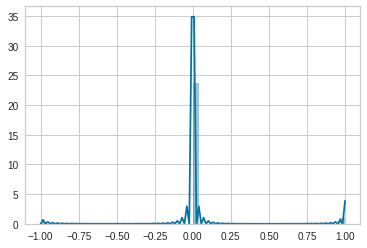

In [266]:
sns.distplot((y_test-y_predict), bins = 50)

**7. Metrics related for evaluating the model performance**

In [267]:
from sklearn import metrics
print('TRAIN:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_predict_train))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_train,y_predict_train)))

TRAIN:

Mean Absolute Error:  0.052571428571428575
Root Mean Squared Error:  0.22928460168844433


In [268]:
print('TEST:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_predict)))

TEST:

Mean Absolute Error:  0.048
Root Mean Squared Error:  0.21908902300206645


In [269]:
accuracy_train = metrics.accuracy_score(y_train,y_predict_train)
print('Train Accuracy: ',accuracy_train)
accuracy_test = metrics.accuracy_score(y_test,y_predict)
print('Test Accuracy: ',accuracy_test)

Train Accuracy:  0.9474285714285714
Test Accuracy:  0.952


In [270]:
from sklearn.metrics import precision_recall_fscore_support
def plot_classification_report(y_tru, y_prd, figsize=(10, 5), ax=None):
    plt.figure(figsize=figsize)
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = ['Will not avail loan','Will avail loan']
    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

Classification Report for Logistic Regression:



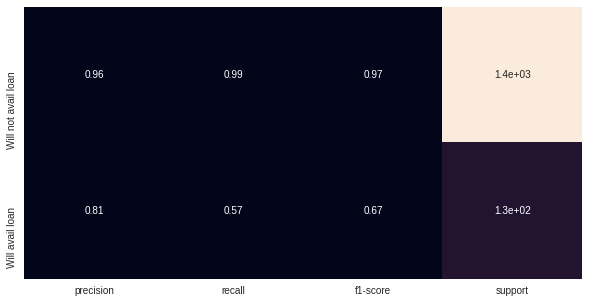

In [271]:
print('Classification Report for Logistic Regression:\n')
plot_classification_report(y_test,y_predict)

Confusion Matrix for Logistic Regression



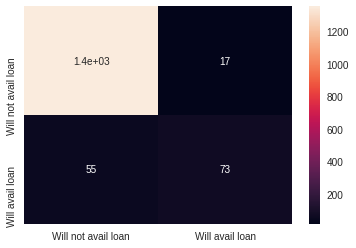

In [277]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix for Logistic Regression\n')
class_name = ['Will not avail loan', 'Will avail loan']
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot = True, xticklabels = class_name, yticklabels = class_name)

**8. Comparison with other classification algorithms**

**8.1 Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict_SVM = SVM.predict(X_test)
print(y_predict_SVM)

[0 0 0 ... 0 0 0]


In [ ]:
y_predict_SVM_train = SVM.predict(X_train)
print(y_predict_SVM_train)

[0 0 0 ... 0 0 0]


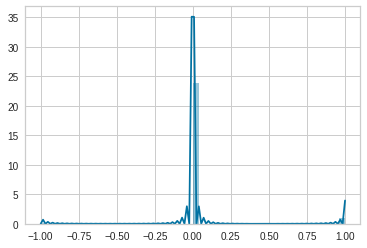

In [ ]:
sns.distplot((y_test-y_predict_SVM), bins = 50)

In [ ]:
print('TRAIN:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_predict_SVM_train))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_train,y_predict_SVM_train)))

TRAIN:

Mean Absolute Error:  0.04971428571428571
Root Mean Squared Error:  0.22296700588716195


In [ ]:
print('TEST:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict_SVM))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_predict_SVM)))

TEST:

Mean Absolute Error:  0.042
Root Mean Squared Error:  0.20493901531919198


In [ ]:
accuracy_train = metrics.accuracy_score(y_train,y_predict_SVM_train)
print('Train Accuracy: ',accuracy_train)
accuracy_test = metrics.accuracy_score(y_test,y_predict_SVM)
print('Test Accuracy: ',accuracy_test)

Train Accuracy:  0.9502857142857143
Test Accuracy:  0.958


Classification Report for Support Vector Machine:



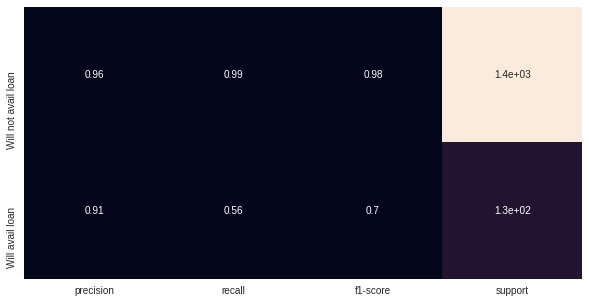

In [ ]:
print('Classification Report for Support Vector Machine:\n')
plot_classification_report(y_test,y_predict_SVM)

Confusion Matrix for Support Vector Machine



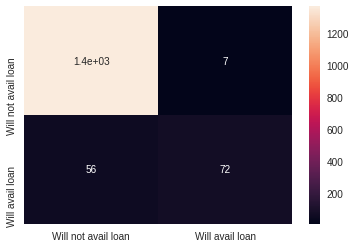

In [279]:
print('Confusion Matrix for Support Vector Machine\n')
cf_matrix = confusion_matrix(y_test, y_predict_SVM)
sns.heatmap(cf_matrix, annot = True, xticklabels = class_name, yticklabels = class_name)

**8.2 K-Neighbor Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_predict_knn = knn.predict(X_test)
print(y_predict_knn)

[0 0 0 ... 0 0 0]


In [ ]:
y_predict_knn_train = knn.predict(X_train)
print(y_predict_knn_train)

[0 1 0 ... 0 0 0]


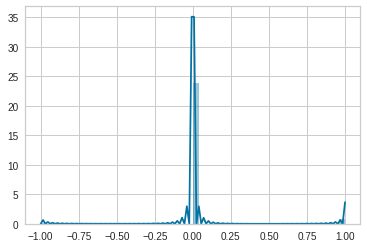

In [ ]:
sns.distplot((y_test-y_predict_knn), bins = 50)

In [ ]:
print("TRAIN:\n")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train,y_predict_knn_train))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train,y_predict_knn_train)))

TRAIN:

Mean Absolute Error:  0.03942857142857143
Root Mean Squared Error 0.1985662897587892


In [ ]:
print('TEST:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict_knn))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_predict_knn)))

TEST:

Mean Absolute Error:  0.042666666666666665
Root Mean Squared Error:  0.2065591117977289


In [ ]:
accuracy_train_knn = metrics.accuracy_score(y_train,y_predict_knn_train)
print('Train Accuracy: ',accuracy_train_knn)
accuracy = metrics.accuracy_score(y_test,y_predict_knn)
print('Test Accuracy: ',accuracy)

Train Accuracy:  0.9605714285714285
Test Accuracy:  0.9573333333333334


Classification Report for KNeighbors Classifier:



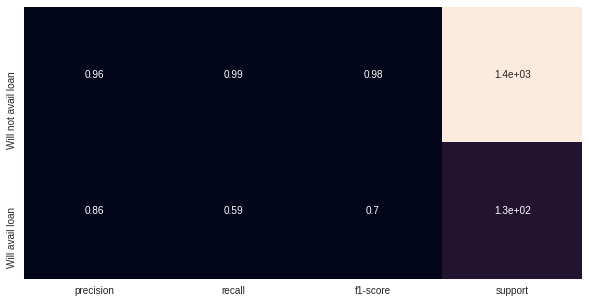

In [ ]:
print('Classification Report for KNeighbors Classifier:\n')
plot_classification_report(y_test,y_predict_knn)

Confusion Matrix for Logistic Regression



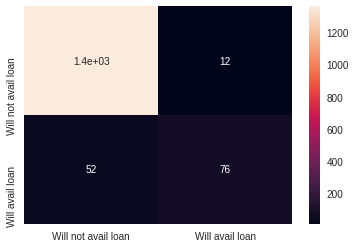

In [280]:
print('Confusion Matrix for KNeighbors Classifier\n')
cf_matrix = confusion_matrix(y_test, y_predict_knn)
sns.heatmap(cf_matrix, annot = True, xticklabels = class_name, yticklabels = class_name)

**8.3 Naive-Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict_nb = nb.predict(X_test)
print(y_predict_nb)

[0 0 0 ... 0 0 0]


In [ ]:
y_predict_nb_train = nb.predict(X_train)
print(y_predict_nb_train)

[1 0 0 ... 0 0 0]


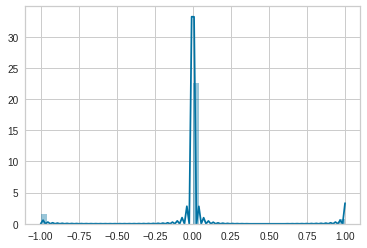

In [ ]:
sns.distplot((y_test-y_predict_nb), bins = 50)

In [ ]:
print('TRAIN:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_predict_nb_train))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_train,y_predict_nb_train)))

TRAIN:

Mean Absolute Error:  0.09857142857142857
Root Mean Squared Error:  0.3139608710833702


In [ ]:
print('TEST:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict_nb))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_predict_nb)))

TEST:

Mean Absolute Error:  0.094
Root Mean Squared Error:  0.3065941943351178


In [ ]:
accuracy_train_nb = metrics.accuracy_score(y_train,y_predict_nb_train)
print('Train Accuracy: ',accuracy_train_nb)
accuracy = metrics.accuracy_score(y_test,y_predict_nb)
print('Accuracy: ',accuracy)

Train Accuracy:  0.9014285714285715
Accuracy:  0.906


Classification Report for Naive-Bayes Classifier:



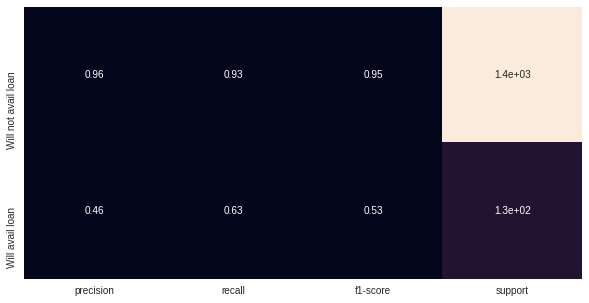

In [ ]:
print('Classification Report for Naive-Bayes Classifier:\n')
plot_classification_report(y_test,y_predict_nb)

Confusion Matrix for Naive-Bayes Classifier



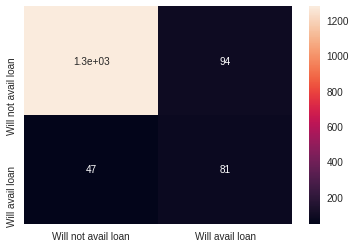

In [281]:
print('Confusion Matrix for Naive-Bayes Classifier\n')
cf_matrix = confusion_matrix(y_test, y_predict_nb)
sns.heatmap(cf_matrix, annot = True, xticklabels = class_name, yticklabels = class_name)

On comparing, I have found that for this particular dataset **Support Vector Machine** predicted  the likelihood of a liability customer buying personal loans with highest accuracy, followed by **KNeighbors Classifier**. **Logistic Regression** followed being a little less accurate and **Naive-Bayes Classifier** had the minimum accuracy.




**9. Business understanding of the model**

Bank Service is an essential worldwide service. Considering this fact, I have decided to build a Machine Learning Classification Model to support this service by helping it to predict the likelihood of a liability customer buying personal loans. 

The model has been built keeping in mind that identification of potential customers who have a higher probability of purchasing Personal Loans will not only lead to an increase the bank's profit and success rate but also will reduce the cost of organizing manual campaigns to identify the same.

The dataset contains certain basic information about the bank's customers along with the particulars whether they have purchased Personal Loans or not. The dataset after preprocessing is used to train and later test our model in order to make it befitting for achieving our goals.

The model aims at providing the maximum accuracy and help in boosting the bank's overall income from its customers by leading the bank to approach the customers having a higher probability of purchasing Personal Loans.

We have tested 4 classification algorithms to predict if a customer avails Personal Loan or not, namely Logistic Regression, Support Vector Machine, KNeighbors Classifier and Naive-Bayes Classifier. As a result of testing we have found the following accuracies:


*   **Logistic Regression: 0.952**
*   **Support Vector Machine: 0.958**
*   **KNeighbors Classifier: 0.957**
*   **Naive-Bayes Classifier: 0.906**

From a business point of view, the bank is likely to have higher success rate and profit and a potential reduction in its campaign costs if it implements SVM or KNeighbors Classifier or Logistic Regression model. Since the Naive-Bayes Classifier has a significantly lower accuracy, it would not as profitable to the bank as the other classifiers.




 
